# Examen

**Antes de empezar, cierra el archivo y renombralo cambiando "Apellido1" por tu primer apellido y "Nombre" por tu nombre. Después vuelve a abrirlo y trabaja directamente sobre él.**

---
## Ejercicio 0

Como siempre, antes de empezar, importa todas las librerías que necesitas para trabajar **(0 pts)**:

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import random

Importación de las imágenes

In [259]:
camera = plt.imread("camera.png")
coffe = plt.imread("coffe.png")
coins = plt.imread("coins.png")
lenna = plt.imread("lenna.png")
spn_lenna = plt.imread("spn_lenna.png")

---
## Ejercicio 1

Define una función llamada **"color2grayscale"** que reciba una imagen a color como parámetro y la devuelva en escala de grises aplicando la media entre los 3 colores **(0,5 pts)**:

In [260]:
def color2grayscale(img):
    imggray = (img[:,:,0]/img.shape[2]) + (img[:,:,1]/img.shape[2]) + (img[:,:,2]/img.shape[2])
    return imggray

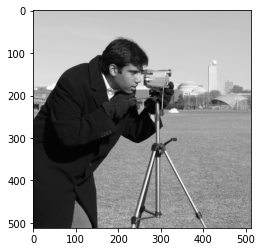

In [261]:
img1 = color2grayscale(camera)
plt.imshow(img1, cmap="gray")
plt.show()

---
## Ejercicio 2

Define una función llamada **"white_lines"** que reciba una imagen en escala de grises y devuelva una copia de la misma, con todas las filas de píxels pares y las columnas impares en blanco **(0,5 pts)**:

In [262]:
def white_lines(img):
    imgwhite = img.copy()
    posf = np.arange(0, img.shape[0], 2)
    posc = np.arange(1, img.shape[1], 2)
    imgwhite[posf, :] = 1
    imgwhite[:,posc] = 1
    return imgwhite

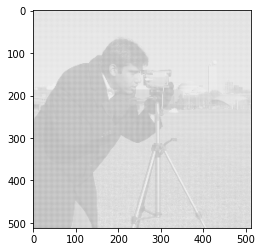

In [263]:
img2 = white_lines(img1)
plt.imshow(img2, cmap="gray")
plt.show()

---
## Ejercicio 3

Crea una función llamada **"create_colors"** que reciba dos parámetros, filas y columnas. La función deverá devolver una imagen de tamaño *filas* x *columnas* que contenga lo siguiente **(0,75 pts)**:
*  El cuadrante superior izquierdo será totalmente rojo
*  El cuadrante superior derecho será totalmente verde
*  El cuadrante inferior izquierdo será totalmente azul
*  El cuardante inferior derecho será una media de los tres colores

In [264]:
def create_colors(filas, columnas):
    img = np.zeros(shape=(filas, columnas, 3))
    img[:filas//2,:columnas//2,0] = 1


    img[:filas//2,columnas//2:,1] = 1


    img[filas//2:,:columnas//2,2] = 1


    img[filas//2:,columnas//2:,0] = 1/img.shape[2]
    img[filas//2:,columnas//2:,1] = 1/img.shape[2]
    img[filas//2:,columnas//2:,2] = 1/img.shape[2]
    return img

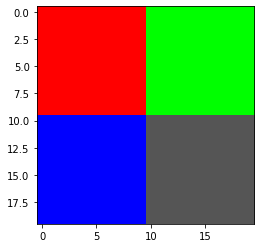

In [265]:
img3 = create_colors(20, 20)
plt.imshow(img3, cmap="gray")
plt.show()

---
## Ejercicio 4

Haz una función llamada **"image_fusion"** que reciba dos imágenes del mismo tamaño en escala de grises y un número del 0 al 100 (comprueba que el número está en el rango y que las imágenes tienen el mismo tamaño. De no ser así devuelve un "None"). La función devolverá una imagen que contenga ambas imágenes sumadas aplicando la proporción indicada en el 3º parámetro. Aquí tenéis un ejemplo con un único píxel **(1,25 pts)**:

```
imagen_1 = 10
imagen_2 = 5
proporcion = 80
imagen_resultante = (10 * 80 + (100 - 80) * 5) / 100
imagen_resultante = 9
```

In [266]:
def image_fusion(img1, img2, num):
    if (num < 0 or num > 100 or img1.shape != img2.shape): return None
    img3 = (img1 * num + img2 * (100 - num)) / 100
    return img3


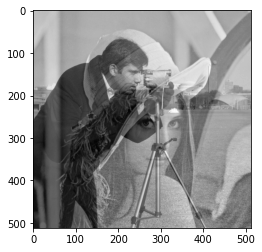

In [267]:
img4 = image_fusion(color2grayscale(camera), lenna, 60)
if img4 is None: print("None")
else:
    plt.imshow(img4, cmap="gray")
    plt.show()

---
## Ejercicio 5

Haz una función llamada **"make_noise"** que reciba como parámetro una imagen en escala de grises y un porcentaje de ruido. La función deberá aplicar, al porcentaje indicado de la imagen, ruido en forma de valores 0 o 1 (por ejemplo, el 0.3 o 0.8 **NO están permitidos**). Por último, devolverá la imágen con ruido **(1,5 pts)**:

In [268]:
def make_noise(img, ruido):
    imgnoise = img.copy()
    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            if random.random() * 100 < ruido:
                imgnoise[i,j] = random.randint(0,1)
    return imgnoise

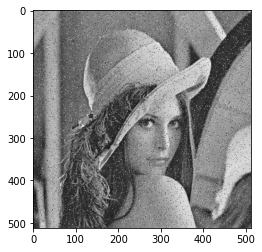

In [269]:
img5 = make_noise(lenna, 5)
plt.imshow(img5, cmap="gray")
plt.show()

---
## Ejercicio 6

Haz una función llamada **"code_redundance"** que, recibiendo una imagen en escala de grises (2D) como parámetro, devuelva un string en binario aplicando la redundancia de código. También deberá devolver la tabla donde muestre la relación entre cada intensidad y su código binario **(1,5 pts)**:

In [270]:
def code_redundance(img):
    lista = ""
    tabla1, tabla2 = {}, {}
    valores = np.unique(img)
    leng = bin(len(valores)).replace("0b","")
    cont = 0
    for x in valores:
        tabla1[x] = cont
        cont += 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            b = bin(tabla1[img[i,j]]).replace("0b", "")
            while len(b) < len(leng):
                b = "0"+b
            lista += b
            tabla2[img[i,j]] = b
    return lista, tabla2

In [278]:
lista, tabla = code_redundance(lenna)
print(tabla)
print(lista)

{0.63529414: '10001001', 0.6313726: '10001000', 0.6156863: '10000100', 0.6392157: '10001010', 0.64705884: '10001100', 0.627451: '10000111', 0.60784316: '10000010', 0.6117647: '10000011', 0.6039216: '10000001', 0.59607846: '01111111', 0.61960787: '10000101', 0.654902: '10001110', 0.6509804: '10001101', 0.6745098: '10010011', 0.67058825: '10010010', 0.6862745: '10010110', 0.6784314: '10010100', 0.6666667: '10010001', 0.65882355: '10001111', 0.5803922: '01111011', 0.5529412: '01110100', 0.50980395: '01101001', 0.46666667: '01011110', 0.4627451: '01011101', 0.41568628: '01010001', 0.38039216: '01001000', 0.36862746: '01000101', 0.36078432: '01000011', 0.34509805: '00111111', 0.4: '01001101', 0.3764706: '01000111', 0.40392157: '01001110', 0.39215687: '01001011', 0.40784314: '01001111', 0.4117647: '01010000', 0.43137255: '01010101', 0.42352942: '01010011', 0.41960785: '01010010', 0.42745098: '01010100', 0.43529412: '01010110', 0.45882353: '01011100', 0.44313726: '01011000', 0.4745098: '01100

---
## Ejercicio 7

Haz una función llamada **"threshold"** que, recibiendo una imagen y un número, devuelva la imagen umbralizada utilizando como punto de corte el número recibido como parámetro **(0,5 pts)**:

In [272]:
def threshold(img, num):
    return img > num

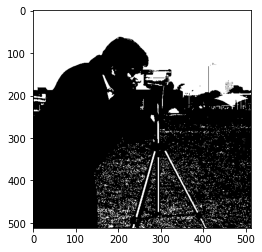

In [273]:
img7 = threshold(img1, 0.5)
plt.imshow(img7, cmap="gray")
plt.show()

---
## Ejercicio 8


Haz una función llamada **"image_smoothing"** que, recibiendo una imágen como parámetro de entrada, devuelva una versión de la imagen suavizada (la imagen original no debe ser modificada). Para lograrlo, en cada punto de la imagen se calculará como su nuevo valor la media de todos sus vecinos sin tener en cuenta el valor del punto en sí **(1 pt)**:

P.D.: *No hace falta que os preocupéis por los bordes*

In [274]:
def image_smoothing(img):
    imgsuave = img.copy()
    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            imgsuave[i,j] = (np.mean(img[i-1:i+1, j-1:j+1])*9-img[i,j])/8
    return imgsuave

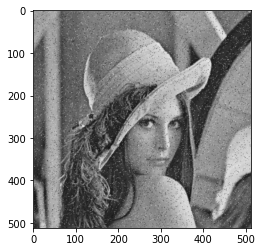

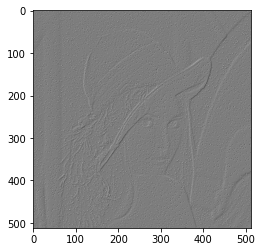

In [275]:
img8 = image_smoothing(img5)
plt.imshow(img8, cmap="gray")
plt.show()
plt.imshow(img5-img8, cmap="gray")
plt.show()
# Es demasiado sutil para apreciarse pero funciona

---
## Ejercicio 9

Haz una función llamada **"show_lines"** que recibiendo una imagen en escala de grises, detecte los bordes de la misma aplicando siempre la siguiente máscara:

*  [[0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]]

Deverá devolver una única imagen en negro con todos los bordes detectados en blanco **(1,5 pts)**:

P.D.: *No hace falta que os preocupéis por los extremos de la imagen, no es necesario tratarlos.*

In [276]:
def show_lines(img):
    mask = np.array([[0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]])
    imgmask = np.zeros(img.shape)
    f, c = mask.shape[0]//2, mask.shape[1]//2
    for i in range(0+f, img.shape[0]-f):
        for j in range(0+c, img.shape[1]-c):
            imgmask[i,j] = applymask(img, mask, i, j)
    return imgmask

def applymask(img, mask, i, j):
    value = 0
    f, c = mask.shape[0]//2, mask.shape[1]//2
    for x in range(-f, f+1):
        for y in range(-c, c+1):
            value += img[i+x, j+y] * mask[x+f, y+c]
    return value

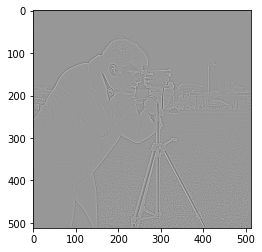

In [277]:
img9 = show_lines(img1)
plt.imshow(img9, cmap="gray")
plt.show()